# Python for Data Analysys Skillcraft1 Data Set
*Johny LIN and Jérémy GOLDSCHILD*

*Project ESILV Promo 2021 IoT*

![eSport-Starcraft-II](media/starcraftgif.gif)


In [1]:
%autosave 60

Autosaving every 60 seconds


## Import Libairy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


## Overview Dataset

### Context
StarCraft II  is a science fiction real-time strategy video game developed and published by Blizzard Entertainment.

The StarCraft II video game is a multiplayer game where several players compete in an arena to collect resources, capture strategic points and destroy opposing bases.

StarCraft II has been a success, selling more than six million copies worldwide and establishing itself as a major title in real-time strategy games and electronic sports.

### Dataset Information

#### Source
> **The Dataset is availible here :** [SkillCraft1 Master Table Data Set](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset)
#### Creators

- Creators: Mark Blair, Joe Thompson, Andrew Henrey, Bill Chen
- Mark Blair: Department of Psychology; Simon Fraser University; Burnaby; 8888 University Drive; mblair '@' sfu.ca)
- Date: September, 20, 2013

#### Dataset information given

- We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action.
- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.
- List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)

#### Dataset features 

 Feature | Description | Type
 --- | --- | ---
 GameID | Unique ID number for each game | integer
 LeagueIndex | Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues Ordinal 1-8 | integer
 Age | Age of each player | integer
HoursPerWeek | Reported hours spent playing per week  | integer
TotalHours |  Reported total hours spent playing  | integer
PM | Action per minute | float
SelectByHotkeys | Number of unit or building selections made using hotkeys per timestamp | float
AssignToHotkeys | Number of units or buildings assigned to hotkeys per timestamp | float
UniqueHotkeys | Number of unique hotkeys used per timestamp | int
MinimapAttacks | Number of attack actions on minimap per timestamp | float
MinimapRightClicks | number of right-clicks on minimap per timestamp | float
NumberOfPACs | Number of PACs per timestamp | float
GapBetweenPACs | Mean duration in milliseconds between PACs | float
ActionLatency | Mean latency from the onset of a PACs to their first action in milliseconds | float
ActionsInPAC | Mean number of actions within each PAC | float
TotalMapExplored | The number of 24x24 game coordinate grids viewed by the player per timestamp | int
WorkersMade | Number of SCVs, drones, and probes trained per timestamp | float
UniqueUnitsMade | Unique unites made per timestamp | int
ComplexUnitsMade | Number of ghosts, infestors, and high templars trained per timestamp | float
ComplexAbilitiesUsed | Abilities requiring specific targeting instructions used per timestamp | float


### Objectif of the analysis

With this dataset, the **objectif is to predict Starcraft II player's league** according to the feature in the dataset.

The video game features **a ranking system** that ranks players based on their performance and victory in competitive matches.
The ranking system is characterized in different leagues from the Bronze league (the lowest level) to the Professional league (a professional level).

Icon | Name Rank | Level
--- | --- | ---
 ![GMaster](media/GrandmasterMedium.png)| Grandmaster | Professional
 ![Master](media/MasterMedium.png)| Master | Competitive
 ![Diamond](media/DiamondMedium.png)| Diamond | Good
 ![Platinium](media/PlatinumMedium.png)| Platinum | Medium+
 ![Gold](media/GoldMedium.png)| Gold | Medium
 ![Silver](media/SilverMedium.png)| Silver | Medium-
 ![Bronze](media/BronzeMedium.png)| Bronze | Low
 
 
Its multiplayer mode has been particularly popular, especially in South Korea, where many players have achieved professional status and are still competing in televised games. And this project can be used as a tool to evaluated the player performance with his action during a game.



## Import the DataSet

> We import the dataset downloaded in the workspace from the source [SkillCraft1 Master Table Data Set](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset)

In [4]:
skillcraft =  pd.read_csv("dataset/SkillCraft1_Dataset.csv", sep = ",")
skillcraft.head(15)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


> We check the features types if they agree with the information provided by the source

## Data Exploration

In [5]:
print(f"The dimension of the Skillcraft dataset : {skillcraft.shape}")

The dimension of the Skillcraft dataset : (3395, 20)


> Number of Instances given by [dataset information](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset) is also 3395. 

In [6]:
skillcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

## Data Cleaning

> We notice that Age, HoursPerWeek and TotalHours have object data type so the wrong data type according the source. They must be int data type.

In [7]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(skillcraft[column])}\n")

Age unique value
 : ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39' '?']

HoursPerWeek unique value
 : ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '?' '80' '60']

TotalHours unique value
 : ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '?' '35' '1163' '333' '75' '7' '40' '325' '90' '175'
 '88' '850' '26' '1650' '465' '235

> We inspect the different unique value of each columns and we notice that missing value inside which is characterized by the **value "?"**. 

In [8]:
title = skillcraft.columns
for i in range(len(title)):
    count=0
    col=skillcraft.iloc[:, i]
    for j in range(len(col)):
        if col[j] == '?':
            count+=1
    print(str(title[i]) + " : " + str(count))

GameID : 0
LeagueIndex : 0
Age : 55
HoursPerWeek : 56
TotalHours : 57
APM : 0
SelectByHotkeys : 0
AssignToHotkeys : 0
UniqueHotkeys : 0
MinimapAttacks : 0
MinimapRightClicks : 0
NumberOfPACs : 0
GapBetweenPACs : 0
ActionLatency : 0
ActionsInPAC : 0
TotalMapExplored : 0
WorkersMade : 0
UniqueUnitsMade : 0
ComplexUnitsMade : 0
ComplexAbilitiesUsed : 0


In [9]:
#!pip3 install missingno
import missingno as msno
%matplotlib inline

In [10]:
sc_clean = skillcraft
ind = []
for i in range(len(sc_clean.TotalHours)):
    if sc_clean.TotalHours[i] == "?":
        ind.append(i)
        
sc_clean = sc_clean.drop(index=sc_clean.index[ind])
sc_clean = sc_clean.reset_index()
sc_clean

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,...,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,...,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,2,56,4,30,10,200,69.9612,0.001101,0.000336,4,...,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,58,3,32,10,500,122.8908,0.001136,0.000327,2,...,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,...,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3334,3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,...,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3335,3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,...,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3336,3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,...,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [11]:
title = sc_clean.columns
for i in range(len(title)):
    count=0
    col= sc_clean.iloc[:, i]
    for j in range(len(col)):
        if col[j] == '?':
            count+=1
    print(str(title[i]) + " : " + str(count))
    

index : 0
GameID : 0
LeagueIndex : 0
Age : 0
HoursPerWeek : 0
TotalHours : 0
APM : 0
SelectByHotkeys : 0
AssignToHotkeys : 0
UniqueHotkeys : 0
MinimapAttacks : 0
MinimapRightClicks : 0
NumberOfPACs : 0
GapBetweenPACs : 0
ActionLatency : 0
ActionsInPAC : 0
TotalMapExplored : 0
WorkersMade : 0
UniqueUnitsMade : 0
ComplexUnitsMade : 0
ComplexAbilitiesUsed : 0


In [12]:
sc_clean.dtypes

index                     int64
GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [13]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(sc_clean[column])}\n")

Age unique value
 : ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39']

HoursPerWeek unique value
 : ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '80' '60']

TotalHours unique value
 : ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '35' '1163' '333' '75' '7' '40' '325' '90' '175' '88'
 '850' '26' '1650' '465' '235' '1350' '46

In [14]:
for column in ['Age', 'HoursPerWeek', 'TotalHours']:
    skillcraft[column] = pd.to_numeric(sc_clean[column], errors = 'coerce').astype(int,errors ='ignore')
skillcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

> We did not succeed to convert object datatype to int64 but only object to float despite using the astype function.
> We use errors = 'coerce' to force the convertion of invalid values to NaN.

In [15]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(sc_clean[column])}\n")

Age unique value
 : ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39']

HoursPerWeek unique value
 : ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '80' '60']

TotalHours unique value
 : ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '35' '1163' '333' '75' '7' '40' '325' '90' '175' '88'
 '850' '26' '1650' '465' '235' '1350' '46

> **to_numerical** function can't convert non-numeric values to NaN and ignore columns containing these values. So all **?** values are converted in NaN. Now, we can estimate NaN values in the dataset and clean it.

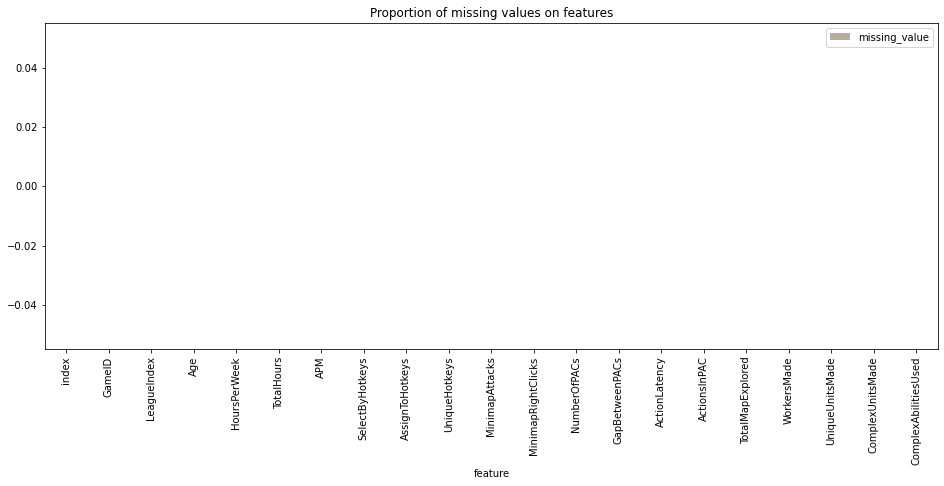

In [16]:
missing_value = pd.DataFrame(sc_clean.isnull().sum()).reset_index()
missing_value.columns = ['feature', 'missing_value']
missing_value.plot(x='feature', title='Proportion of missing values on features', kind='bar', cmap="BrBG", alpha=0.4,figsize=(16, 6))

In [17]:
# On rajoute une colonne avec les noms des ligues
league_indexs = skillcraft["LeagueIndex"].unique()
league_indexs.sort()
league_name = ["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster","Profesional"]
league_indexs

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [18]:
league_df = pd.DataFrame(league_name, columns= ['league'])
league_df['LeagueIndex'] = league_indexs
league_df

,league,LeagueIndex
0,Bronze,1
1,Silver,2
2,Gold,3
3,Platinum,4
4,Diamond,5
5,Master,6
6,GrandMaster,7
7,Profesional,8


In [19]:
sc_clean = sc_clean.merge(league_df,on ="LeagueIndex")
sc_clean.sort_values(by ="LeagueIndex")

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,league
2556,765,2231,1,26,2,100,48.4494,0.000709,0.000228,3,...,0.002775,52.9913,84.6061,3.1991,26,0.000553,7,0.000000,0.000048,Bronze
2574,1166,3339,1,23,2,200,44.8266,0.000117,0.000093,3,...,0.002137,58.2418,94.7541,4.0437,21,0.000724,7,0.000000,0.000047,Bronze
2573,1152,3302,1,23,8,60,51.5208,0.000912,0.000155,5,...,0.002202,52.7874,101.3438,4.1016,21,0.000224,5,0.000000,0.000000,Bronze
2572,1148,3287,1,21,16,100,94.9017,0.003313,0.000097,2,...,0.002027,118.0000,110.0952,7.3810,12,0.000161,3,0.000000,0.000000,Bronze
2571,1139,3265,1,27,14,50,58.4136,0.001569,0.000349,4,...,0.001604,46.2418,106.5652,6.4783,14,0.001011,5,0.000000,0.000000,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1976,5604,7,16,28,500,201.4350,0.008216,0.000380,7,...,0.004234,32.7302,46.9022,6.8641,29,0.001875,8,0.000173,0.000288,GrandMaster
2701,1853,5289,7,16,28,2500,185.3424,0.010909,0.000918,5,...,0.004505,28.0093,44.2593,5.3333,31,0.000803,6,0.000386,0.000240,GrandMaster
2700,1787,5129,7,23,56,2500,213.6318,0.014339,0.000842,7,...,0.006499,30.5893,35.2771,4.1092,35,0.001311,11,0.000318,0.002217,GrandMaster
2698,1627,4699,7,23,14,750,166.5456,0.006804,0.000361,6,...,0.004065,18.4845,49.2562,6.1219,26,0.000664,7,0.000000,0.000000,GrandMaster


> The dataset is finally clean. We can use it in Data Visualisation and Machine Learning

## Data Visualization


In [20]:
count_league = sc_clean.groupby(["LeagueIndex","league"], as_index=False)["GameID"].count()
count_league = pd.DataFrame(count_league)
count_league.rename(columns = {'GameID' : 'count'}, inplace=True)
count_league

,LeagueIndex,league,count
0,1,Bronze,167
1,2,Silver,347
2,3,Gold,553
3,4,Platinum,811
4,5,Diamond,804
5,6,Master,621
6,7,GrandMaster,35


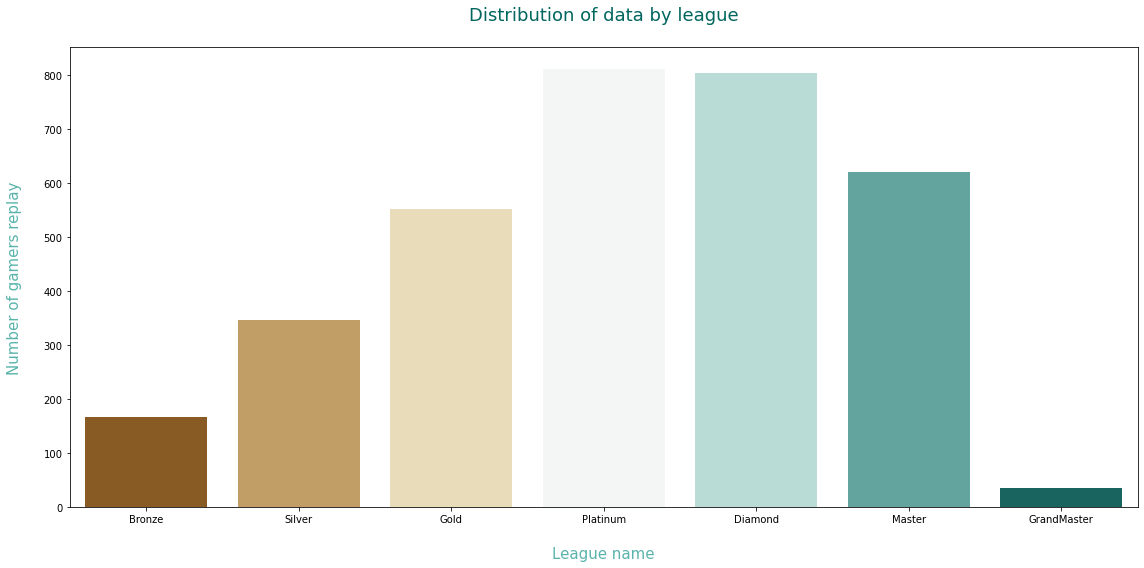

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_league["league"], y=count_league["count"], palette="BrBG")
plt.xlabel('\nLeague name', fontsize=15, color='#5ab4ac')
plt.ylabel("Number of gamers replay\n", fontsize=15, color='#5ab4ac')
plt.title("Distribution of data by league\n", fontsize=18, color='#01665e')
#plt.xticks(rotation= 45)
plt.tight_layout()
#palette "Reds_r"


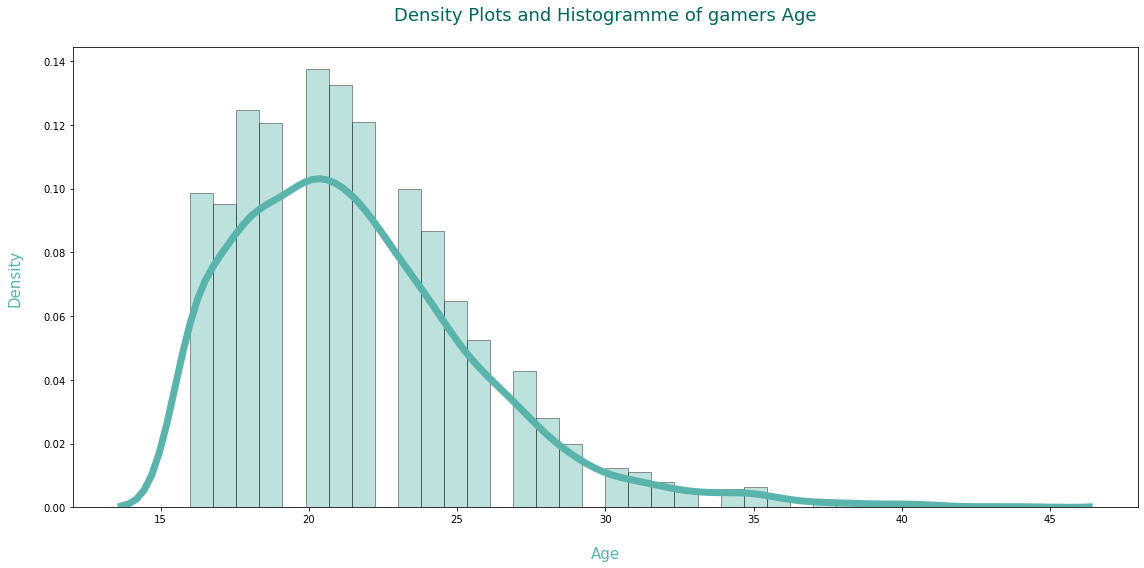

In [40]:
plt.figure(figsize=(16,8))
sns.distplot(sc_clean["Age"], hist=True, kde=True, 
             bins=int(180/5), color = '#5ab4ac', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 7})
plt.xlabel('\nAge', fontsize=15, color='#5ab4ac')
plt.ylabel("Density\n", fontsize=15, color='#5ab4ac')
plt.title("Density Plots and Histogramme of gamers Age\n", fontsize=18, color='#01665e')
#plt.xticks(rotation= 45)
plt.tight_layout()
#palette "Reds_r"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A991C23670>,
      dtype=object)

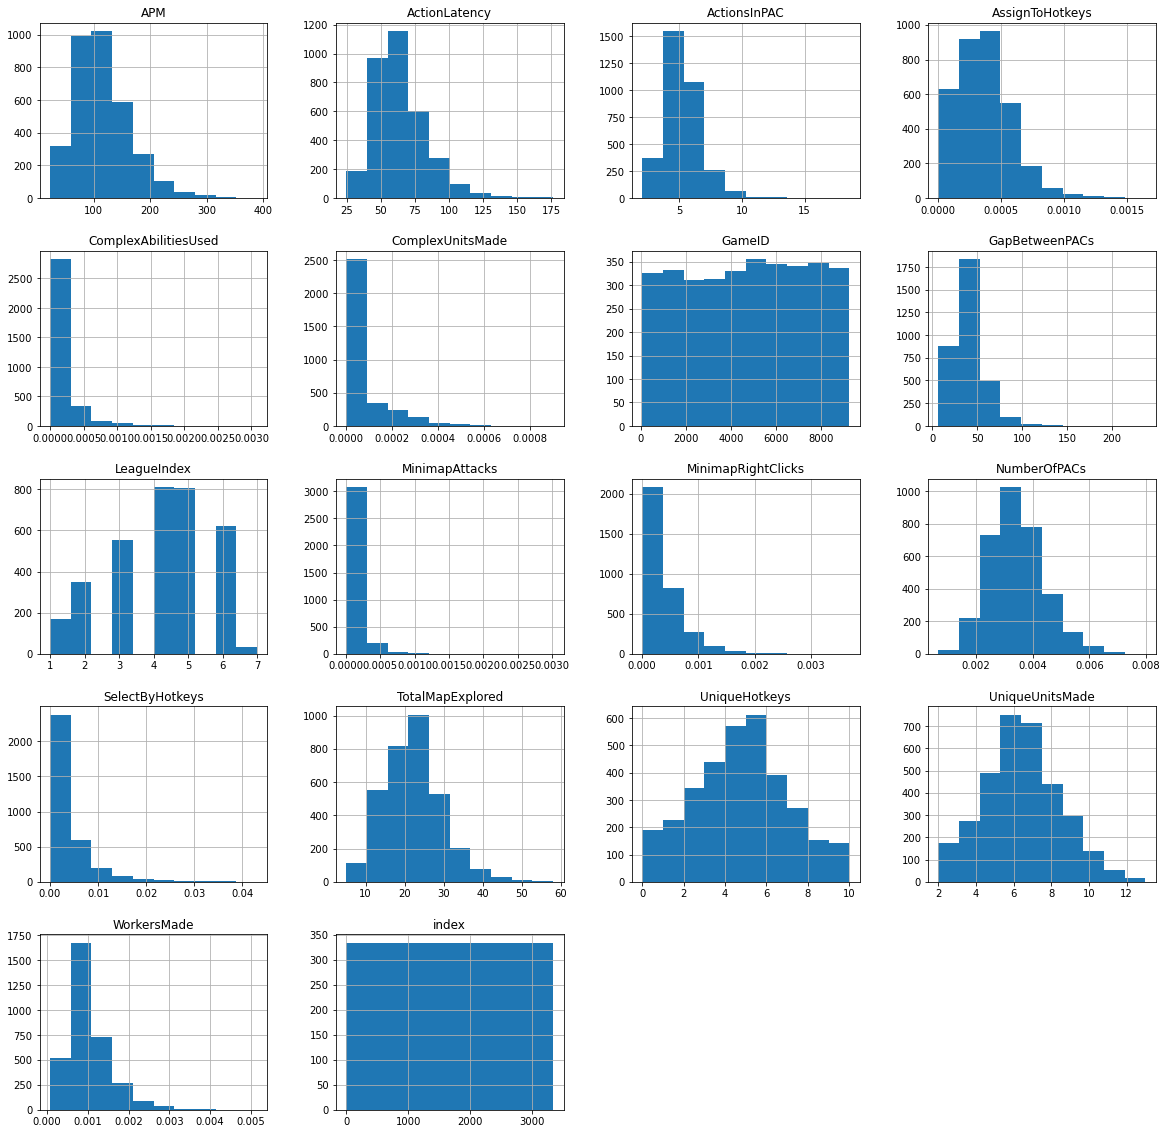

In [46]:
sc_clean.hist(figsize = (20,20))

## Machine Learning

### Data Preparation 


In [23]:
sc_ml = sc_clean.drop(["GameID","league"], axis=1)
X, y = sc_ml.drop('LeagueIndex', axis=1), sc_ml['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
scl = sk.preprocessing.StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [25]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)                  
y_lr = model_lr.predict(X_test)   
accuracy_score(y_test, y_lr)

NameError: name 'accuracy_score' is not defined

In [26]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)                  
y_lda = model_lda.predict(X_test)   
accuracy_score(y_test, y_lda)

NameError: name 'accuracy_score' is not defined

In [42]:
model_nb = GaussianNB()                       
model_nb.fit(X_train, y_train)                  
y_nb = model_nb.predict(X_test)   
accuracy_score(y_test, y_nb)

NameError: name 'accuracy_score' is not defined

In [43]:
model_rf = RandomForestClassifier(n_estimators=1000)                       
model_rf.fit(X_train, y_train)                  
y_rf = model_rf.predict(X_test)   
accuracy_score(y_test, y_rf)

NameError: name 'accuracy_score' is not defined

In [ ]:
model_dt = DecisionTreeClassifier()                     
model_dt.fit(X_train, y_train)                  
y_dt = model_dt.predict(X_test)   
accuracy_score(y_test, y_dt)

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=16)                   
model_kn.fit(X_train, y_train)                  
y_kn = model_kn.predict(X_test)   
accuracy_score(y_test, y_kn)

In [ ]:
model_svc = SVC(gamma="auto")             
model_svc.fit(X_train, y_train)                  
y_svc = model_svc.predict(X_test)   
accuracy_score(y_test, y_svc)


In [44]:
grid  = {
    'n_neighbors':range(1, 30),
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid,
    verbose = 1,
    cv = 5,
    n_jobs = -1)

res = gs.fit(X_train, y_train)
res.best_estimator_

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:    7.3s finished


KNeighborsClassifier(metric='manhattan', n_neighbors=27)

In [45]:
y_kng = res.predict(X_test)   
accuracy_score(y_test, y_kng)

NameError: name 'accuracy_score' is not defined